In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
df = pd.read_csv('../reports/result_df.csv')
df = df[df['num'].isna()].dropna(axis=1)
df = df[df['loss'] != 'mse']

In [26]:
def add_benchmarks():
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    plt.plot([-0.5, 150.5], [13.176, 13.176], ls='--', c='C3', label='M4 winner', lw=2)
    plt.plot([-0.5, 150.5], [12.913, 12.913], ls='--', c='C4', label='N-BEATS', lw=2)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.legend()
    
def keep_duplicates(df, column):
    
    gb = df.groupby(column)

    for group in gb.groups:
        try:
            mask.merge(gb.get_group(group).drop([column, 'smape', 'mase*'], axis=1), how='inner')
        except NameError:
            mask = gb.get_group(group).drop([column, 'smape', 'mase*'], axis=1)
            
    results = [gb.get_group(group).merge(mask) for group in gb.groups]
    
    return pd.concat(results)

## Comparison of all models

In [27]:
df['name'] = ['_'.join([str(x) for x in df.iloc[i].drop(['smape', 'mase*'])]) for i in range(len(df))] 

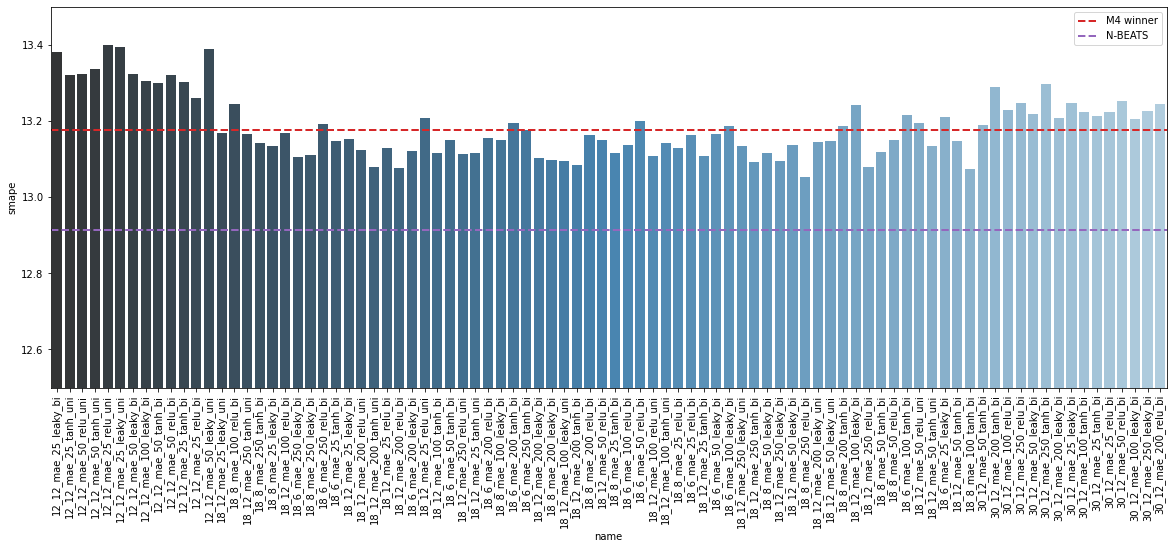

In [28]:
plt.figure(figsize=(20, 7))
sns.barplot(x='name', y='smape', data=df, palette='Blues_d')
plt.ylim([12.5, 13.5])

plt.xticks(rotation=90)

add_benchmarks()

## Input size

In [96]:
df2 = df[df.drop(['name', 'input_len', 'smape', 'mase*'], axis=1).duplicated(keep=False)].drop('name', axis=1)
df2 = keep_duplicates(df2, 'input_len')

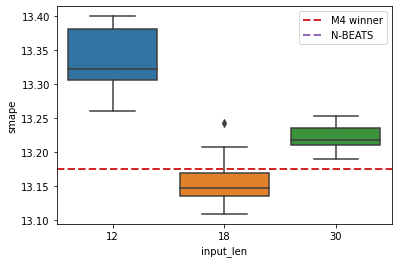

In [102]:
sns.boxplot(x='input_len', y='smape', data=df2)
add_benchmarks()

## Output size

In [106]:
df3 = keep_duplicates(df.drop('name', axis=1), 'output_len')

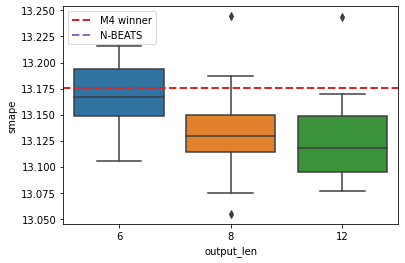

In [109]:
sns.boxplot(x='output_len', y='smape', data=df3)
add_benchmarks()

## Bottleneck

In [111]:
df4 = keep_duplicates(df.drop('name', axis=1), 'bottleneck_size')

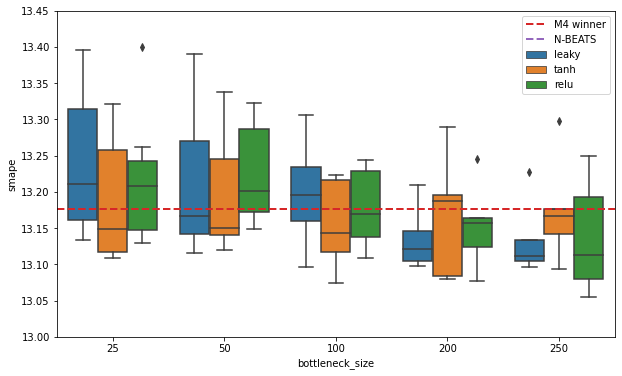

In [122]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='bottleneck_size', y='smape', data=df4, hue='bottleneck_activation')
plt.ylim([13, 13.45])
add_benchmarks()

## LSTM type

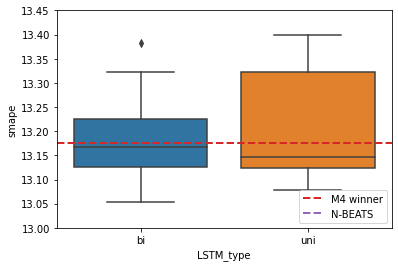

In [129]:
df5 = keep_duplicates(df.drop('name', axis=1), 'LSTM_type')

sns.boxplot(x='LSTM_type', y='smape', data=df5)
plt.ylim([13, 13.45])
add_benchmarks()

### 5 best models (according to SMAPE)

In [130]:
df.sort_values('smape').head(5)

,input_len,output_len,loss,bottleneck_size,bottleneck_activation,LSTM_type,smape,mase*,name
945,18,8,mae,250,relu,bi,13.054597,2.663258,18_8_mae_250_relu_bi
1110,18,8,mae,100,tanh,bi,13.075011,2.670147,18_8_mae_100_tanh_bi
439,18,12,mae,200,relu,bi,13.076729,2.677115,18_12_mae_200_relu_bi
1011,18,12,mae,250,relu,bi,13.079339,2.678644,18_12_mae_250_relu_bi
406,18,12,mae,200,tanh,uni,13.079393,2.675894,18_12_mae_200_tanh_uni


## Conclusions:

- The most improtant hyperparameter is **by far** the loss function. MSE makes the models barely untrainable. The difference is so significant that there must be a reason behind this. One possible explanation is that MSE requires different training parameters to operate properly (e.g. smaller/higher learning rates). 
- Bottleneck hyperparameters have **little impact** to the training. Generally speaking **larger** bottleneck sizes prove to be better than smaller ones. **Note**: the best bottleneck sizes are so large that this cannot be strictly be considered an *Autoencoder*, as the bottleneck representation is very rich (its size is much larger than that of its input). I can't make any conclusion regarding the activation fucntion fo the bottleneck, other than *tanh* seems to be a bit more consistent than the other two (smaller mean/median values, less variation).
- **Bidirectional** LSTM layers are a bit supperior than unidirectional ones.